In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 
# show the graph in jupyter notebook

In [2]:
df = pd.read_csv("/data/insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Single variable plotting strategy

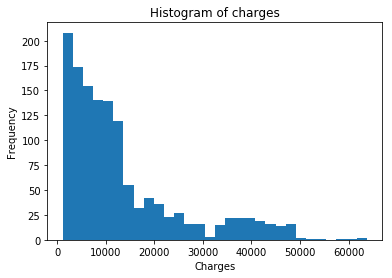

In [4]:
plt.hist(df.charges, bins = 30);
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of charges");

In [5]:
import scipy.stats as stats
import numpy as np

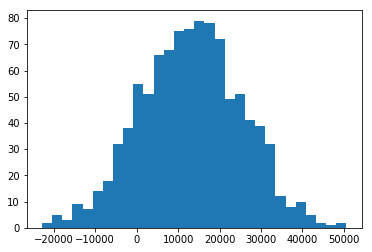

In [6]:
charges_mean = np.mean(df.charges)
charges_std = np.std(df.charges)
plt.hist(stats.norm.rvs(charges_mean, charges_std, 1000), bins = 30);

Text(0, 0.5, 'Frquency')

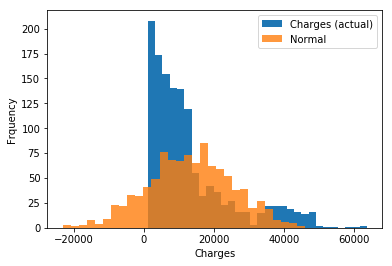

In [7]:
plt.hist(df.charges, bins = 30, label = "Charges (actual)");
plt.hist(stats.norm.rvs(charges_mean, charges_std, 1000)
        , bins = 30, alpha = 0.8, label = "Normal");
plt.legend()

plt.xlabel("Charges")
plt.ylabel("Frquency")

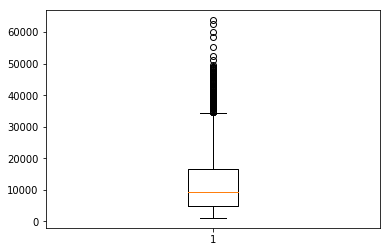

In [8]:
plt.boxplot(df.charges);

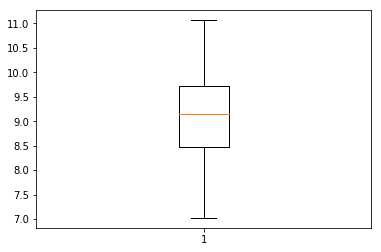

In [9]:
plt.boxplot(np.log(df.charges));

Text(0, 0.5, 'Frquency')

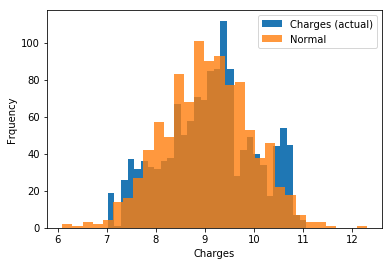

In [25]:
y = np.log(df.charges)
plt.hist(y, bins = 30, label = "Charges (actual)");
plt.hist(stats.norm.rvs(np.mean(y), np.std(y), 1000)
        , bins = 30, alpha = 0.8, label = "Normal");
plt.legend()

plt.xlabel("Charges")
plt.ylabel("Frquency")

In [10]:
a = np.array([9, 3, 4, 5, 8, 2, 1, -1, 4])

In [11]:
np.sort(a)

array([-1,  1,  2,  3,  4,  4,  5,  8,  9])

In [12]:
np.percentile(a, [25, 50, 75])

array([2., 4., 5.])

In [13]:
def outlier(a):
    q1, q2, q3 = np.percentile(a, [25, 50, 75])
    iqr = q3 - q1
    print(q3, q3 + 1.5 * iqr)
    upper_whisker = min(np.max(a), q3 + 1.5 * iqr)
    lower_whisker = max(np.min(a), q1 - 1.5 * iqr)
    print("Upper: ", upper_whisker, " lower: ", lower_whisker)
    return (a > upper_whisker) | (a<lower_whisker)


7.25 14.75
Upper:  14.75  lower:  -1
[False False False False False False False False False  True]


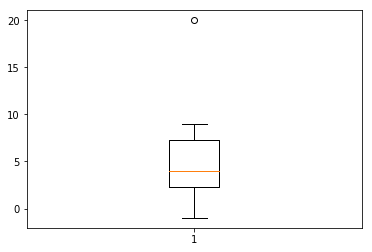

In [14]:
a = np.array([9, 3, 4, 5, 8, 2, 1, -1, 4, 20])
print(outlier(a))
plt.boxplot(a);

Text(0.5, 1.0, 'Frequency plot by region')

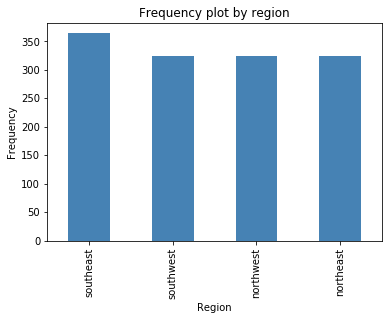

In [15]:
df.region.value_counts().plot.bar(color = "steelblue")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Frequency plot by region")

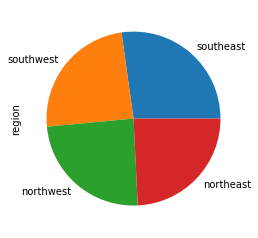

In [16]:
df.region.value_counts().plot.pie()

# Two variable plotting strategy

Text(0.5, 1.0, 'Scatter plot - charges by age')

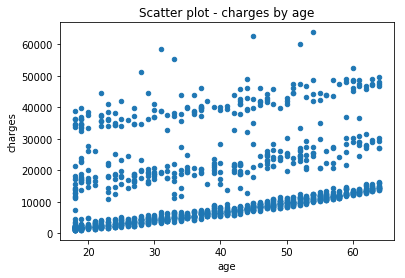

In [17]:
df.plot.scatter("age", "charges")
plt.title("Scatter plot - charges by age")

Text(0.5, 1.0, 'Scatter plot - charges by age')

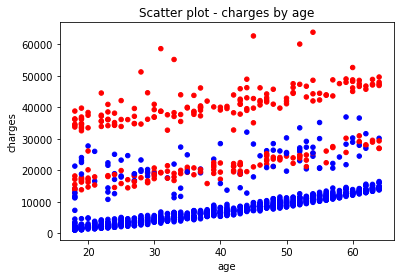

In [18]:
colors = np.where(df.smoker == "yes", "red", "blue")
df.plot.scatter("age", "charges", color = colors)
plt.title("Scatter plot - charges by age")

Text(0.5, 0, 'Region')

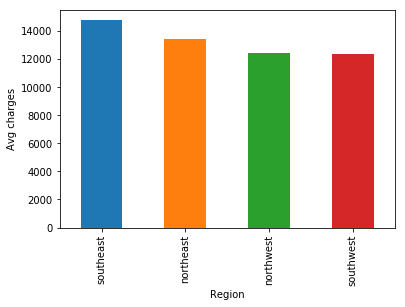

In [19]:
df.groupby("region").charges.mean()\
.sort_values(ascending = False).plot.bar()
plt.ylabel("Avg charges")
plt.xlabel("Region")

In [20]:
import seaborn as sns

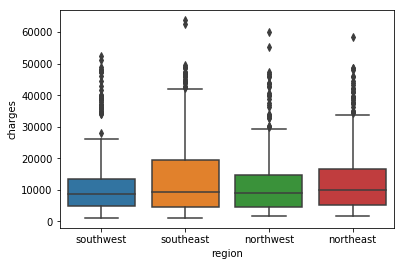

In [21]:
sns.boxplot("region", "charges", data = df)

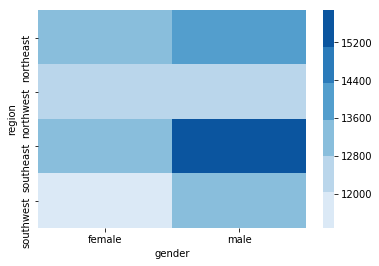

In [22]:
agg = df.pivot_table("charges", "region", "gender")
sns.heatmap(agg, cmap = sns.color_palette("Blues"))

In [23]:
bitcoin = pd.read_csv("https://api.blockchain.info/charts/market-price?format=csv&timespan=all", header = None)

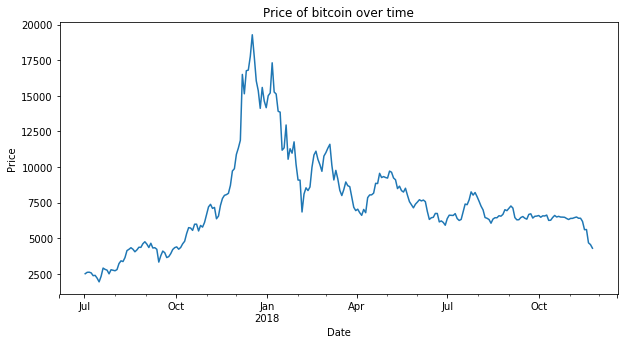

In [24]:
plt.figure(figsize=(10, 5))
bitcoin.index = pd.to_datetime(bitcoin[0])
bitcoin[1].loc["2017-07":].plot()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price of bitcoin over time")

plt.savefig("bitcoing.pdf")